# Model Evaluation
RMSE and R<sup>2</sup> results of the ML algorithm&preprocessing combinations are compared in heatmaps. 

ML algorithms used in this thesis are:
- CNN: Convolutional Neural Network
- KNN: K-Nearest Neighbor Regressor
- MLP: Multilayer Perceptron neural network
- Kernel Ridge: Kernel Ridge Regressor (polynomial kernel)
- PLS: Partial Least Squares Regressor
- Random Forest: Random Forest Regressor
- XGBoost: Extreme Gradient Boosting Regressor
- LSSVM: Least Squares Support Vector Machine Regressor

In [ ]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# Needed for Python to find the util modules
sys.path.insert(0, "src")
sys.path.insert(0, "..")
import util.m06_model_plotting as plot_util
import util.m00_general_util as util

In [3]:
print(os.getcwd())
os.chdir("../..")

C:\Users\sebne\OneDrive\Documents\FHWN_Tulln\DataAnalysis\repo\src\notebooks


In [33]:
# Combining JSON files into one
my_files = ["temp/model_evaluation/model_output_kernel_ridge_poly.json", 
            "temp/model_evaluation/model_output_knn.json", 
            "temp/model_evaluation/model_output_random_forest.json",
            "temp/model_evaluation/model_output_pls.json", 
            "temp/model_evaluation/model_output_mlp.json",
            "temp/model_evaluation/model_output_xgboost.json",
            "temp/model_evaluation/model_output_cnn1.json",
            "temp/model_evaluation/model_output_cnn2.json",
            "temp/model_evaluation/model_output_lssvm_poly.json",
         ]
util.merge_json_files(my_files, output_file="model_output.json")

In [5]:
def show_train_test_heatmap_old(model_results, title, left_metric = "Test_R2", right_metric = "Train_R2", cmap = "YlGnBu"):
    pivot = plot_util.create_model_performance_pivot(model_results, metric=left_metric)
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    ax1, ax2 = axes
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax1)
    ax1.set_title(f"{title} - {left_metric}")
    pivot = plot_util.create_model_performance_pivot(model_results, metric=right_metric)
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax2)
    ax2.set_title(f"{title} - {right_metric}")
    plt.show()

In [27]:
def show_train_test_heatmap(model_results, title, left_metric="Test_R2", right_metric="Train_R2", cmap="YlGnBu"):
    # Create pivots for heatmaps
    pivot_left = plot_util.create_model_performance_pivot(model_results, metric=left_metric)
    pivot_right = plot_util.create_model_performance_pivot(model_results, metric=right_metric)

    # Determine the global min and max for color scaling
    vmin = min(pivot_left.min().min(), pivot_right.min().min())
    vmax = max(pivot_left.max().max(), pivot_right.max().max())

    # Set figure size dynamically based on the pivot table shape
    rows, cols = pivot_left.shape
    fig_size = (cols * 1.5, rows * 1.5)  # Adjust scaling factor as needed

    # Create figure and axes for heatmaps
    fig, axes = plt.subplots(1, 2, figsize=fig_size, gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.3})
    ax1, ax2 = axes

    # Create the heatmaps with shared vmin/vmax and smaller font size
    sns.heatmap(pivot_left, cmap=cmap, annot=True, fmt=".3f", ax=ax1, vmin=vmin, vmax=vmax, cbar=False, 
                square=True, annot_kws={"size": 10})  # Adjust annotation font size
    ax1.set_title(f"{title} - {left_metric}", fontsize=10)  # Adjust title font size
    ax1.set_aspect("equal")  
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)  # Adjust x-axis label size
    ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=8)  # Adjust y-axis label size

    # Adjust the colorbar size to match the heatmap
    cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  # [left, bottom, width, height]
    
    sns.heatmap(pivot_right, cmap=cmap, annot=True, fmt=".3f", ax=ax2, vmin=vmin, vmax=vmax, cbar=True, 
                cbar_ax=cbar_ax, square=True, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})  
    ax2.set_title(f"{title} - {right_metric}", fontsize=10)  
    ax2.set_aspect("equal")  
    ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=8)  
    ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=8)  

    # Adjust colorbar font size
    cbar_ax.tick_params(labelsize=10)  

    # Show the plot
    plt.show()


In [66]:
def show_single_heatmap(model_results, title, metric="Test_R2", cmap="YlGnBu"):
    # Create pivots for heatmaps
    pivot = plot_util.create_model_performance_pivot(model_results, metric=metric)

    fig, axes = plt.subplots(figsize=(15,6))
    rows, cols = pivot.shape
    fig_size = (cols * 2, rows * 2)  

    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", cbar=True, 
                square=True, annot_kws={"size": 10},vmin=0.5, vmax=4.5)  # Adjust annotation font size
    axes.set_title(f"{title} - {metric}", fontsize=10)  # Adjust title font size
    axes.set_aspect("equal")  
    axes.set_xlabel("pre-processing")  # Adjust title font size
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=8)  # Adjust x-axis label size
    axes.set_yticklabels(axes.get_yticklabels(), fontsize=8)  # Adjust y-axis label size


    # Show the plot
    plt.show()

In [36]:
balanced_specimen1_pca = pd.read_json("temp/model_evaluation/model_output_plotting.json")

## RMSE Heatmaps

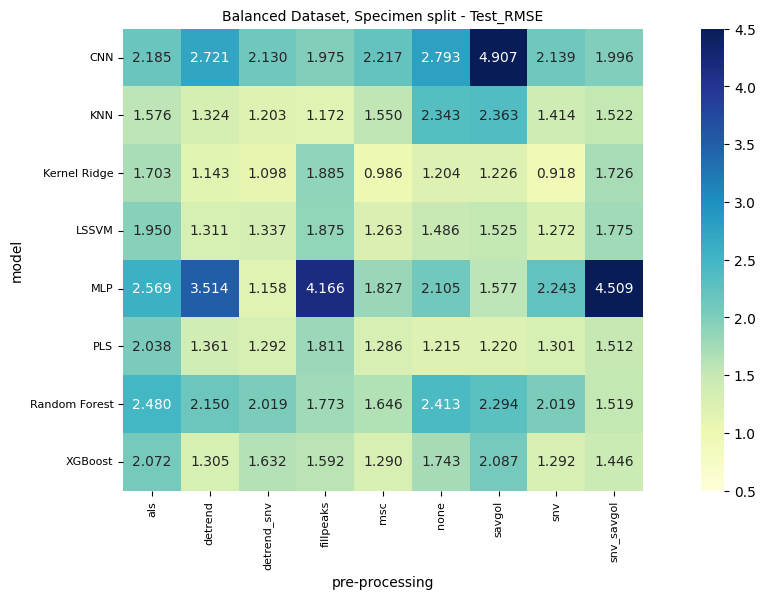

In [67]:
show_single_heatmap(balanced_specimen1_pca, title="Balanced Dataset, Specimen split", metric="Test_RMSE")

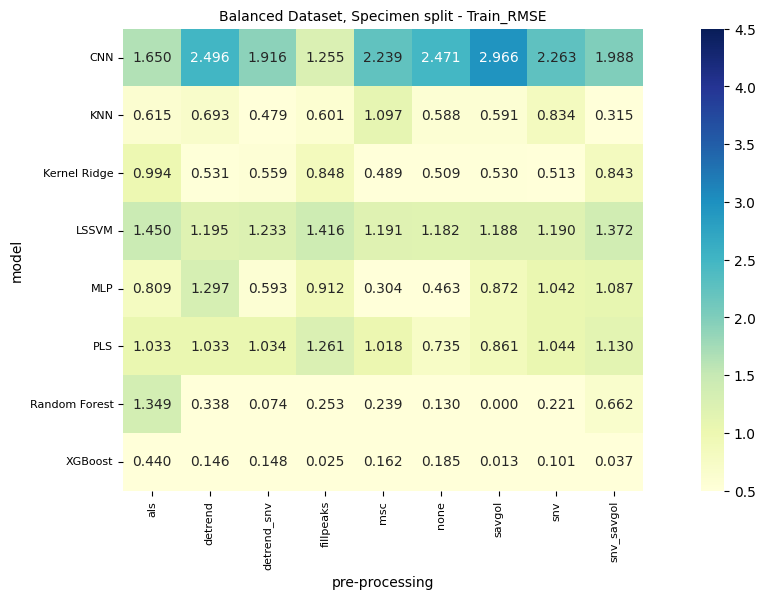

In [68]:
show_single_heatmap(balanced_specimen1_pca, title="Balanced Dataset, Specimen split", metric="Train_RMSE")

## R<sup>2</sup> Heatmaps

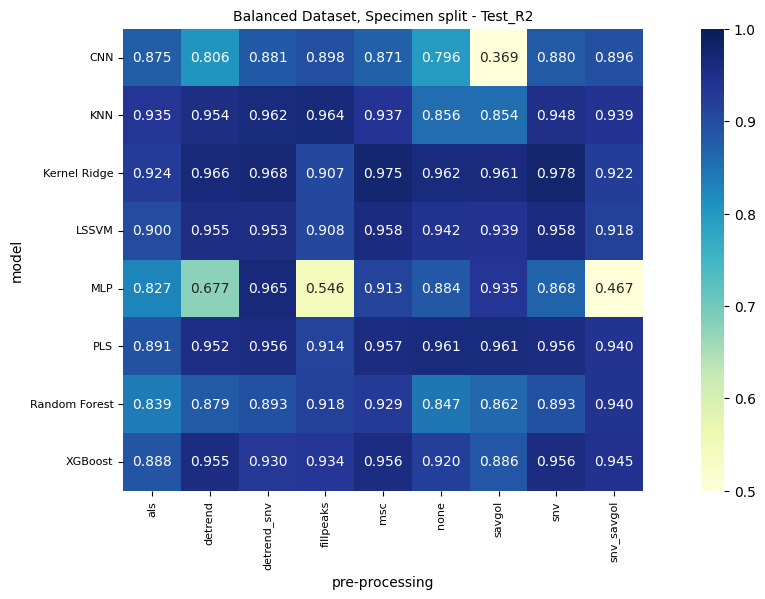

In [61]:
show_single_heatmap(balanced_specimen1_pca, title="Balanced Dataset, Specimen split", metric="Test_R2")

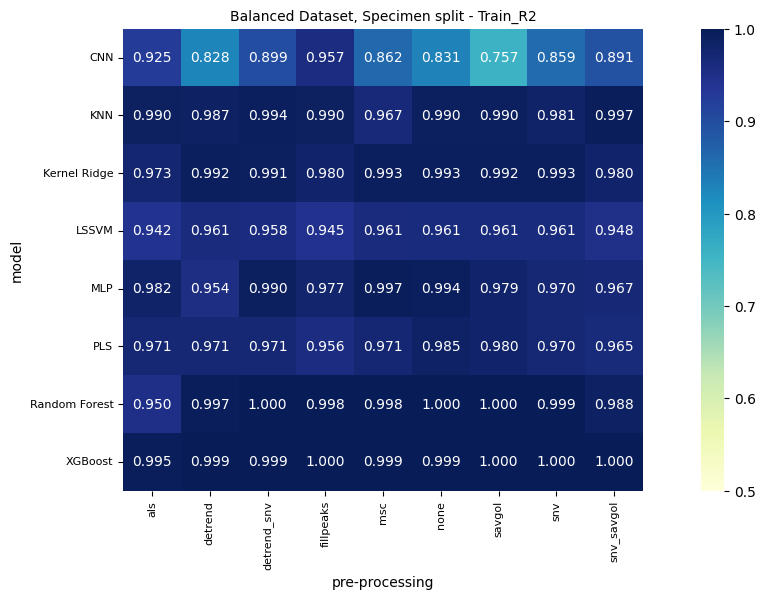

In [62]:
show_single_heatmap(balanced_specimen1_pca, title="Balanced Dataset, Specimen split", metric="Train_R2")

In [11]:
#balanced_specimen1_no_pca = pd.read_json("temp/spectra_treated/nir/balanced/model_output_no_pca.json")
#show_train_test_heatmap(balanced_specimen1_no_pca, "Balanced Model, Specimen split")
#show_train_test_heatmap(balanced_specimen1_no_pca, "Balanced Model, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

balanced_specimen1_pca = pd.read_json("output/model_evaluation/model_output_balanced_specimen1.json")
balanced_specimen1_pca = balanced_specimen1_pca.loc[balanced_specimen1_pca['model'] != 'SVR']

show_train_test_heatmap(balanced_specimen1_pca, "Balanced Model-PCA, Specimen split")
show_train_test_heatmap(balanced_specimen1_pca, "Balanced Model-PCA, Specimen split",left_metric="Test_RMSE", right_metric="Train_RMSE")


In [10]:
balanced_specimen1_pls = pd.read_json("output/model_evaluation/model_output_final_models.json")
show_train_test_heatmap(balanced_specimen1_pls, "Balanced Model-PLS, Specimen split")
#show_train_test_heatmap(balanced_specimen1_pca, "Balanced Model-PCA-No30, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")


In [12]:
balanced_specimen1_withoutpca = pd.read_json("output/model_evaluation/model_output_no_pca.json")
show_train_test_heatmap(balanced_specimen1_withoutpca, "Balanced Model-PLS, Specimen split")
#show_train_test_heatmap(balanced_specimen1_pca, "Balanced Model-PCA-No30, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

In [1]:
#balanced_specimen = pd.read_json("../../temp/spectra_treated/nir/balanced/model_output_balanced_scaling.json")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

#balanced_specimen = pd.read_json("../../temp/spectra_treated/nir/balanced/pls_xgb_model_output_balanced_scaling.json")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")